## Assignment 2 - Youtube Trending Videos Analysis
## Mohammad Hossein Basouli - 401222020

## Imports 

In [162]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns
import math
import json
import re

## Data Collection

- Load each of the CSVs and their corresponding json to join the data related to each region with it's corresponding category list.
- Concatenate all of the obtained data frames to form a singular data frame to work with.

In [163]:
dict_of_file_names = {
 'CAvideos.csv': 'CA_category_id.json',
 'DEvideos.csv': 'DE_category_id.json',
 'FRvideos.csv': 'FR_category_id.json',
 'GBvideos.csv': 'GB_category_id.json',
 'INvideos.csv': 'IN_category_id.json',
 'JPvideos.csv': 'JP_category_id.json',
 'KRvideos.csv': 'KR_category_id.json',
 'MXvideos.csv': 'MX_category_id.json',
 'RUvideos.csv': 'RU_category_id.json',
 'USvideos.csv': 'US_category_id.json'
}

df_list = []
for k, v in dict_of_file_names.items():

    # loading the csv and json
    data = None
    with open('./datasets/' + v) as file:
        data = json.load(file)  # load() for file
    print(f'loaded {v:<25} successfully')
    list_of_cats = data['items']
    # a transformation on the json to extract the title of each category
    def transform_json(json):
        return {
            **{k: v for k, v in json.items() if k != 'snippet'},
            'category_title': json['snippet']['title']
        }
    list_of_cats = list(map(transform_json, list_of_cats))
    # loading json as data frame
    cat = pd.DataFrame(list_of_cats)
    # converting id to numeric
    cat['id'] = pd.to_numeric(cat['id'])
    # join on category
    temp_df = pd.read_csv('./datasets/' + k, encoding='iso-8859-1')
    temp_df['country'] = k[:2]
    temp_df = temp_df.merge(cat, left_on='category_id', right_on='id')
    print(f'loaded {k:<25} successfully')

    df_list.append(temp_df)
    
df = pd.concat(df_list, ignore_index=True)

loaded CA_category_id.json       successfully
loaded CAvideos.csv              successfully
loaded DE_category_id.json       successfully
loaded DEvideos.csv              successfully
loaded FR_category_id.json       successfully
loaded FRvideos.csv              successfully
loaded GB_category_id.json       successfully
loaded GBvideos.csv              successfully
loaded IN_category_id.json       successfully
loaded INvideos.csv              successfully
loaded JP_category_id.json       successfully
loaded JPvideos.csv              successfully
loaded KR_category_id.json       successfully
loaded KRvideos.csv              successfully
loaded MX_category_id.json       successfully
loaded MXvideos.csv              successfully
loaded RU_category_id.json       successfully
loaded RUvideos.csv              successfully
loaded US_category_id.json       successfully
loaded USvideos.csv              successfully


## Data Understanding

#### Shape of the dataset:

In [164]:
df.shape

(373204, 21)

### Head of the dataset:

In [165]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,kind,etag,id,category_title
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/G9LHzQmx44rX2S5ya...",23,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/G9LHzQmx44rX2S5ya...",23,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/UVB9oxX2Bvqa_w_y3...",24,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,Music


### An overview of the columns:

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373204 entries, 0 to 373203
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                373204 non-null  object
 1   trending_date           373204 non-null  object
 2   title                   373204 non-null  object
 3   channel_title           373204 non-null  object
 4   category_id             373204 non-null  int64 
 5   publish_time            373204 non-null  object
 6   tags                    373204 non-null  object
 7   views                   373204 non-null  int64 
 8   likes                   373204 non-null  int64 
 9   dislikes                373204 non-null  int64 
 10  comment_count           373204 non-null  int64 
 11  thumbnail_link          373204 non-null  object
 12  comments_disabled       373204 non-null  bool  
 13  ratings_disabled        373204 non-null  bool  
 14  video_error_or_removed  373204 non-n

## Data Preprocessing

### Handling Missing Values:

- There is no missing values in the columns except for **description**. And actually we can drop this column along with other unnecessary features, because we won't use them.

In [167]:
df.isna().sum(0)

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19183
country                       0
kind                          0
etag                          0
id                            0
category_title                0
dtype: int64

In [168]:
df = df.drop(columns=['thumbnail_link', 'ratings_disabled', 'video_error_or_removed', 'etag', 'kind', 'id', 'description'])

#### Fixing Integration & Inconsistency Issues:

##### Converting Data Types:
- Convert data type of the columns **trending_date** and **publish_time** into date time.

In [169]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time']).dt.tz_localize(None)

##### Checking for Duplicated Videos:
- We remove the rows which have the same values across all of the three columns **video_id**, **country** and **trending_date**.
- Also remove the multiple records of a single video with different trending date in the each country by replacing each by the record that has the maximum views. 

In [170]:
df = df.drop(df[df.duplicated(subset=['video_id', 'country', 'trending_date'])].index)
df = df.loc[(df.groupby(by=['country', 'video_id'], as_index=False)['views'].idxmax())['views']]

In [171]:
df.shape

(205064, 14)

### Feature Engineering:

#### Storing **tags** as a list of strings:

In [172]:
def transform_tag_to_list_of_strings(tags):
    try:
        res = re.findall(r'"([^"]+)"', tags)
        res.pop(0)
        return res
    except:
        return []

df['tags'] = df['tags'].apply(transform_tag_to_list_of_strings)

#### Adding **engagement_score** and **dislike_rate**:

In [173]:
df['engagement_score'] = (df['likes'] + df['dislikes'] + df['comment_count']) / df['views']
df['dislike_rate'] = df['dislikes'] / (df['likes'] + df['dislikes'])

#### Adding **day_of_trend** and **season_of_trend** from **trending_date**:

In [174]:
df['day_of_trend'] = df['trending_date'].dt.day_name()
# Add a season column
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['season_of_trend'] = df['trending_date'].dt.month.apply(get_season)

#### Adding **season_of_publish**, **day_of_publish** and **hour_of_publish** from **publish_time**:

In [175]:
df['season_of_publish'] = df['publish_time'].dt.month.apply(get_season)
df['day_of_publish'] = df['publish_time'].dt.day_name()
df['hour_of_publish'] = df['publish_time'].dt.hour

## Exploratory Data Analysis

#### Summary Statistics:
- Data in the categorical features seems to be highly skewed. e.g. **views**, **likes**, **dislikes**.

In [176]:
df.describe(include=['number'])

,category_id,views,likes,dislikes,comment_count,engagement_score,dislike_rate,hour_of_publish
count,205064.000000,2.050640e+05,2.050640e+05,2.050640e+05,2.050640e+05,205064.000000,200429.000000,205064.000000
mean,20.711617,5.337287e+05,1.625254e+04,9.401973e+02,2.005076e+03,0.044033,0.092908,12.852075
std,6.814658,3.291627e+06,8.859461e+04,1.257358e+04,1.417157e+04,0.048404,0.121972,6.220391
min,1.000000,1.530000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,20.000000,2.566775e+04,3.730000e+02,2.300000e+01,5.900000e+01,0.009892,0.021053,8.000000
50%,24.000000,9.283750e+04,1.721000e+03,9.400000e+01,2.690000e+02,0.026060,0.049073,14.000000
75%,24.000000,3.243368e+05,7.440000e+03,3.710000e+02,1.034000e+03,0.063753,0.113333,18.000000
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,0.959052,1.000000,23.000000


#### Unique values for Categorical Features:

In [177]:
categorical_features = ['country', 'category_title']

# Loop through object (categorical) columns and print unique values
for col in categorical_features:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'country': ['CA' 'DE' 'FR' 'GB' 'IN' 'JP' 'KR' 'MX' 'RU' 'US']
Unique values in 'category_title': ['Gaming' 'News & Politics' 'Sports' 'Music' 'Entertainment' 'Education'
 'Comedy' 'Film & Animation' 'People & Blogs' 'Pets & Animals'
 'Howto & Style' 'Science & Technology' 'Travel & Events' 'Shows'
 'Autos & Vehicles' 'Movies' 'Trailers' 'Nonprofits & Activism']


#### Overall distribution of engagement metrics (views, likes, dislikes)*:
- All of our three **engagement metrics** are extremely skewed towards right. Meaning that most of the data is distributed over a very narrow range.

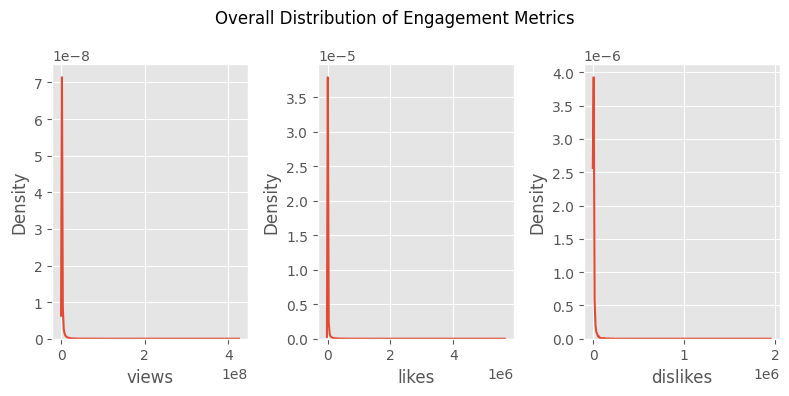

In [178]:
engagement_metrics = ['views', 'likes', 'dislikes']
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

for idx, metric in enumerate(engagement_metrics):
    sns.kdeplot(df, x=metric, ax=axs[idx])

plt.suptitle('Overall Distribution of Engagement Metrics')    
plt.tight_layout()
output_path = './images/overall_distro_of_eng_metrics.png'
plt.savefig(output_path)
plt.show()

#### Distribution of **engagement metrics** for different **video categories**:
- As we saw earlier, and also as we can see from the box plots, the data is extremely skewed and distributed over a very narrow range, in each of the **video categories**, across all the **engagement metrics**. 
- The distribution doesn't most likely follow a normal distribution.

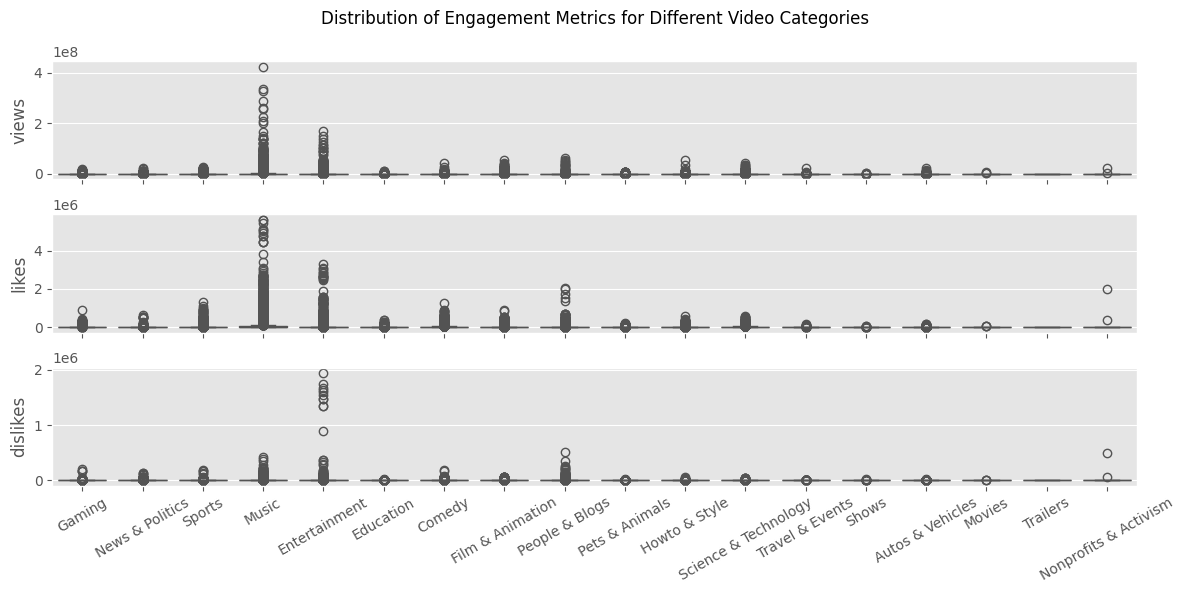

In [179]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6))
engagement_metrics = ['views', 'likes', 'dislikes']
for i, metric in enumerate(engagement_metrics):
    ax = axs[i]
    sns.boxplot(df, x='category_title', y=metric, ax=ax)
    ax.tick_params(axis='x', labelrotation=30, labelsize=10)
    ax.set_xlabel('')
    if i != 2:
        ax.set_xticklabels([])
    ax.set_ylabel(metric)

plt.suptitle('Distribution of Engagement Metrics for Different Video Categories')
plt.tight_layout()
output_path = './images/distro_of_eng_for_diff_cats.png'
plt.savefig(output_path)
plt.show()

#### Effect of **day of week** and **time of publish** on **engagement_score**:
- We observe no effect of **day/hour of publish** on the **engagement_score**

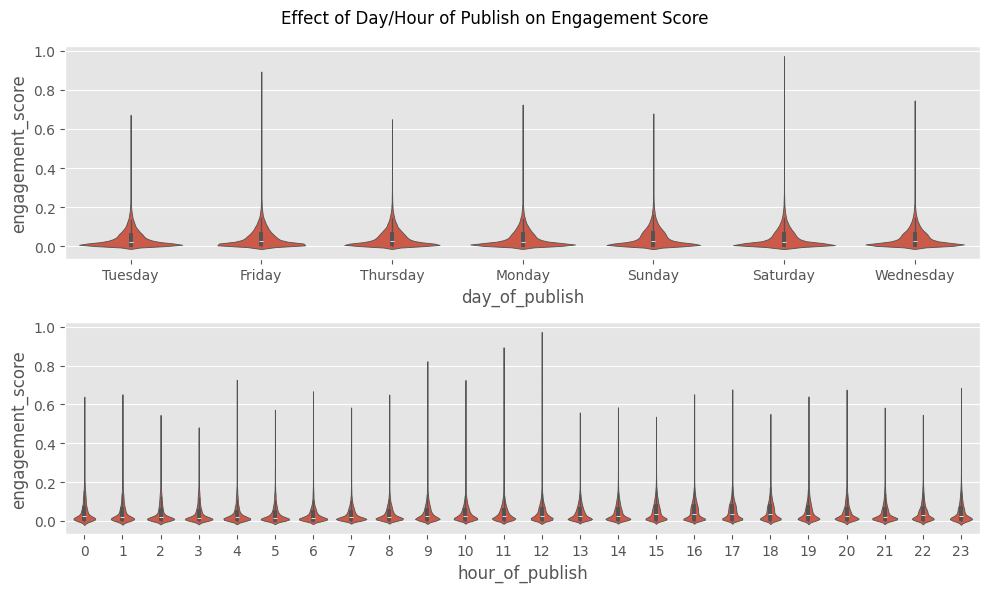

In [180]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

sns.violinplot(df, x='day_of_publish', y='engagement_score', ax=axs[0])
sns.violinplot(df, x='hour_of_publish', y='engagement_score', ax=axs[1])

plt.suptitle('Effect of Day/Hour of Publish on Engagement Score')
plt.tight_layout()
output_path = './images/daily_hourly_pattern_in_eng_score.png'
plt.savefig(output_path)
plt.show()

#### Effect of high **dislike ratio** on **engagement_score**: 
- **dislike_ratio** > 0.6 -> high_dislike_group - **dislike_ratio** < 0.05 -> universally_liked_group.
- Universally liked videos look to have an slightly better **engagement_score** than the **high-dislike** group.

median of the group with a high-dislike ratio:0.015424535101628946
median of the group of universally liked videos:0.015424535101628946


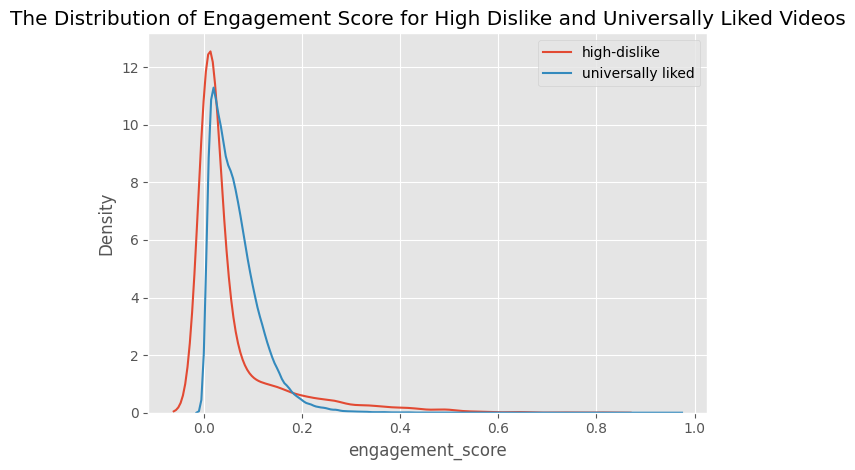

In [181]:
high_dislike_group = df[df['dislike_rate'] > 0.60]
generally_liked_group = df[df['dislike_rate'] < 0.05]
print(f'median of the group with a high-dislike ratio:{high_dislike_group['engagement_score'].median()}')
print(f'median of the group of universally liked videos:{high_dislike_group['engagement_score'].median()}')

sns.kdeplot(high_dislike_group, x='engagement_score', label='high-dislike')
sns.kdeplot(generally_liked_group, x='engagement_score', label='universally liked')
plt.legend()

plt.title('The Distribution of Engagement Score for High Dislike and Universally Liked Videos')
plt.tight_layout()
output_path = './images/effect_of_high_dislike_on_eng.png'
plt.savefig(output_path)
plt.show()

#### Effect of **tag** on the **engagement_score**:
- If we have a look at the graph of **engagement_score** for top 15 common tags, we can see that some of the tags have a significantly higher median than the other tags. e.g. *review* and *music* tags.

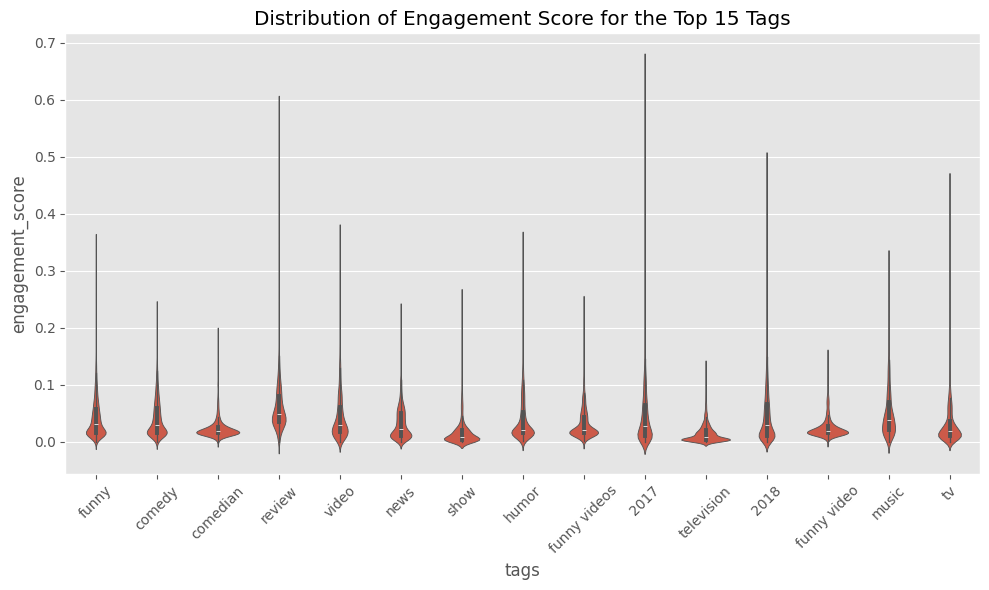

In [182]:
# Explode tags and get top 10 tag counts
temp_df_for_exploded_tags = (
    df.explode(column='tags')
    .value_counts(subset=['tags'], sort=True, ascending=False)
    .to_frame()
)
# Reset index and rename columns
temp_df_for_exploded_tags = temp_df_for_exploded_tags.reset_index()
temp_df_for_exploded_tags.columns = ['tag', 'counts']
temp_df_for_exploded_tags.drop(temp_df_for_exploded_tags[temp_df_for_exploded_tags['tag'] == '|'].index, inplace=True)

top_15_common_tags = temp_df_for_exploded_tags.head(15)['tag']
exploded_df_on_tag = df.explode(column='tags')

plt.figure(figsize=(10, 6))
sns.violinplot(exploded_df_on_tag[exploded_df_on_tag['tags'].isin(top_15_common_tags)], x='tags', y='engagement_score')
plt.xticks(rotation=45)
plt.title('Distribution of Engagement Score for the Top 15 Tags')

plt.tight_layout()
output_path = './images/distro_of_eng_for_top_15_common_tags.png'
plt.savefig(output_path)
plt.show()

#### Correlation between **title length** and **engagement_score**:
- Based on the scatter plot and the heatmap from below, we can say that these two features are not correlated.

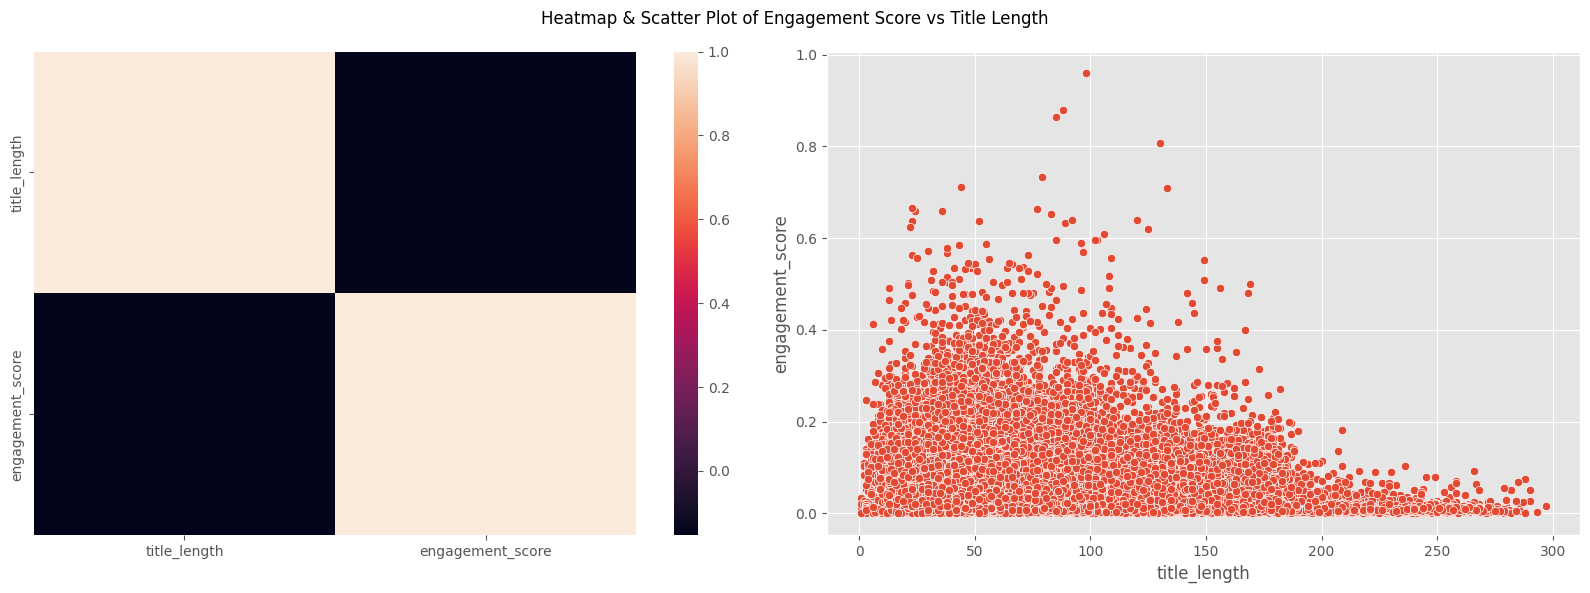

In [183]:
temp_df_containing_title_length = df.copy()
temp_df_containing_title_length['title_length'] = temp_df_containing_title_length['title'].apply(lambda x:len(x))
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(temp_df_containing_title_length[['title_length', 'engagement_score']].corr(), ax=axs[0])
sns.scatterplot(data=temp_df_containing_title_length[['title_length', 'engagement_score']], x='title_length', y='engagement_score', ax=axs[1])
plt.suptitle('Heatmap & Scatter Plot of Engagement Score vs Title Length')

plt.tight_layout()
output_path = './images/heatmap_and_scatter_plot_of_eng_vs_title_len.png'
plt.savefig(output_path)
plt.show()

#### Most trending videos and channels across different **countries** and **globally**:
- *Entertainment* and *Music* are the two most trending **video_categories** in general.
- *YouTube Spotlight* occurs very often among the trending **channels**.

/tmp/ipykernel_4199/1897460313.py:14: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4199/1897460313.py:14: UserWarning: Glyph 132 (\x84) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4199/1897460313.py:14: UserWarning: Glyph 134 (\x86) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4199/1897460313.py:14: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4199/1897460313.py:14: UserWarning: Glyph 133 (\x85) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4199/1897460313.py:14: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4199/1897460313.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_4199/1897460313.py:15: UserWarning: Glyph 131 (\x83) miss

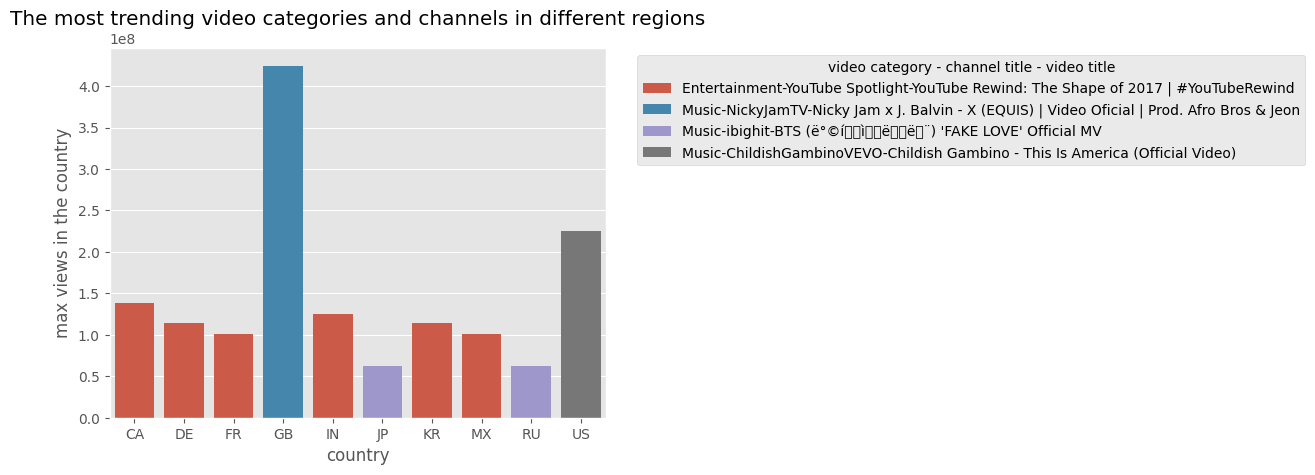

In [184]:
df_of_most_viewed_videos_per_country_records = df.groupby(by=['country'], as_index=False)['views'].max()
df_of_most_viewed_videos_per_country_indices = df.groupby(by=['country'], as_index=False)['views'].idxmax()
df_of_most_viewed_videos_per_country = df.loc[df_of_most_viewed_videos_per_country_indices['views']]
most_viewed_video_idx = df['views'].idxmax()
most_viewed_video = df.iloc[most_viewed_video_idx]

sns.barplot(df_of_most_viewed_videos_per_country, x='country', y='views',
            hue=df_of_most_viewed_videos_per_country.apply(
                lambda x: x['category_title'] + '-' + x['channel_title'] + '-' + x['title'], axis=1))

plt.ylabel('max views in the country')
plt.legend(title='video category - channel title - video title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('The most trending video categories and channels in different regions')
plt.tight_layout()
plt.savefig('./images/most_trend_cats_and_chanells_diff_regions.png', bbox_inches='tight')
plt.show()

#### **Seasonal/Day-of-Week** Patterns in the trending date:
- There is a significant difference between **seasons** in terms of number of occurances.
- There isn't a significant difference between days in terms of occurance in trending videos.

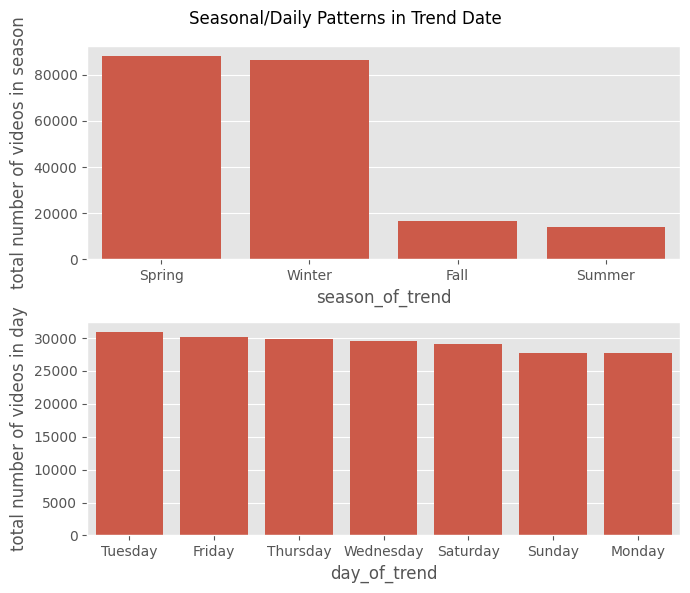

In [185]:
temp_df_for_season_pattern = df.value_counts(subset=['season_of_trend']).reset_index()
temp_df_for_day_pattern = df.value_counts(subset=['day_of_trend']).reset_index()

fig, axs = plt.subplots(2, 1, figsize=(7, 6))

sns.barplot(data=temp_df_for_season_pattern, x='season_of_trend', y='count', ax=axs[0])
axs[0].set_ylabel('total number of videos in season')
sns.barplot(temp_df_for_day_pattern, x='day_of_trend', y='count', ax=axs[1])
axs[1].set_ylabel('total number of videos in day')

plt.suptitle('Seasonal/Daily Patterns in Trend Date')
plt.tight_layout()
output_path = './images/seasonal_daily_patterns_in_trend_date.png'
plt.savefig(output_path)
plt.show()

#### Top 10 most common tags:

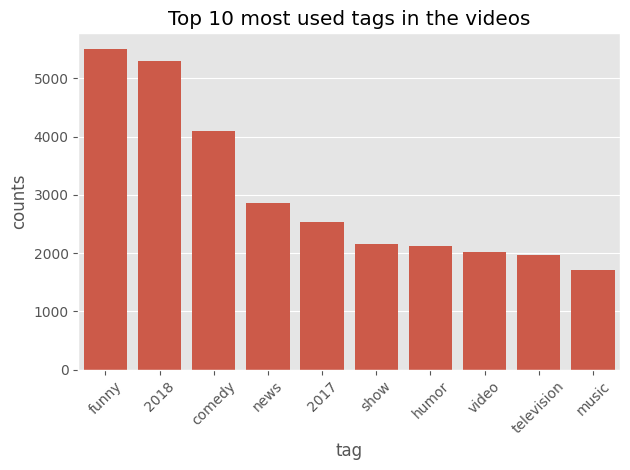

In [186]:
# Explode tags and get top 10 tag counts
temp_df_exploded_tags = (
    df.explode(column='tags')
    .value_counts(subset=['tags'], sort=True, ascending=False)
    # .drop(labels=['|', 'no-tag'])
    .to_frame()
)

# Reset index and rename columns
temp_df_exploded_tags = temp_df_exploded_tags.reset_index()
temp_df_exploded_tags.columns = ['tag', 'counts']
temp_df_exploded_tags.drop(temp_df_exploded_tags[temp_df_exploded_tags['tag'] == '|'].index, inplace=True)

# Plot
sns.barplot(data=temp_df_exploded_tags.head(10), x='tag', y='counts')
plt.xticks(rotation=45)  # Optional: rotate x-labels if needed
plt.title('Top 10 most used tags in the videos')

plt.tight_layout()
output_path = './images/1.png'
plt.savefig(output_path)
plt.show()

#### Frequency distribution of the data among different **video categories**.

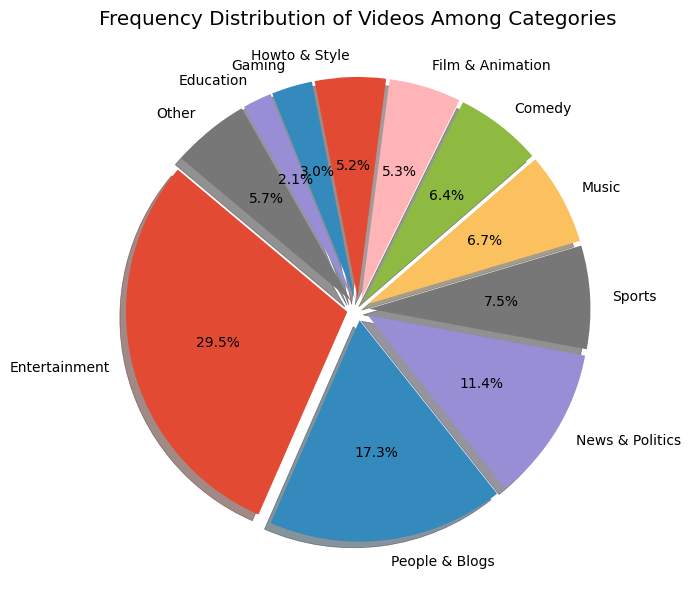

In [187]:
# Count category values
df_of_category_counts = df['category_title'].value_counts()

# Choose top N to show, group the rest as "Other"
top_n = 10
top_categories = df_of_category_counts[:top_n]
others = df_of_category_counts[top_n:].sum()
combined_counts = top_categories.copy()
combined_counts['Other'] = others

# Create explode values – slightly pull out all slices
explode = [0.05] * len(combined_counts)  # Adjust spacing as needed

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    combined_counts.values,
    labels=combined_counts.index,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    shadow=True  # Optional for depth effect
)
plt.title('Frequency Distribution of Videos Among Categories')

plt.tight_layout()
output_path = './images/frequency_distribution_of_videos_among_categories.png'
plt.savefig(output_path)
plt.show()

#### Top 5 most trending **categories** per each **year**:
- We can clearly see that we have had an significant increase in the among of videos in the trending categories in the year 2018 compared to 2017 which means these categories have been developed so much.

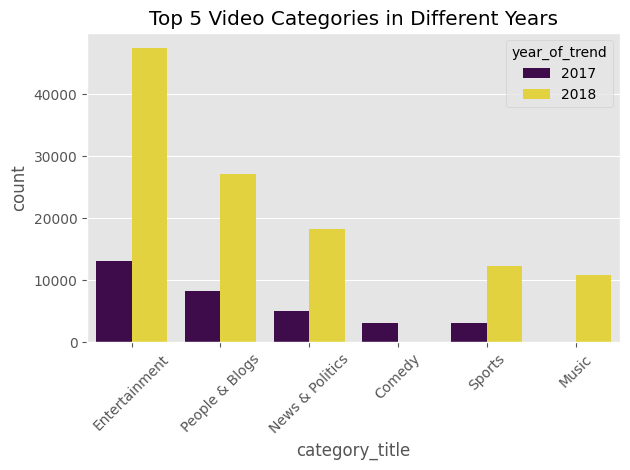

In [188]:
df_containing_year = df.copy()
df_containing_year['year_of_trend'] = df_containing_year['trending_date'].dt.year
df_of_counts_of_video_category_per_year = df_containing_year.groupby(by=['year_of_trend'], as_index=False).value_counts(subset=['category_title'])
df_top_5_categories_per_year = df_of_counts_of_video_category_per_year.groupby(by='year_of_trend').head(5)
sns.barplot(df_top_5_categories_per_year, x='category_title', y='count', hue='year_of_trend', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 5 Video Categories in Different Years')

plt.tight_layout()
output_path = './images/top_5_video_categories_in_diff_years.png'
plt.savefig(output_path)
plt.show()

#### **Seasonal/Daily** pattern in **publish time**:
- There is a significant difference between the total counts of publishes in seasons (e.g. most of the publishes happens in *Spring* and *Winter*.).
- *Friday* has the most publishes among other days.

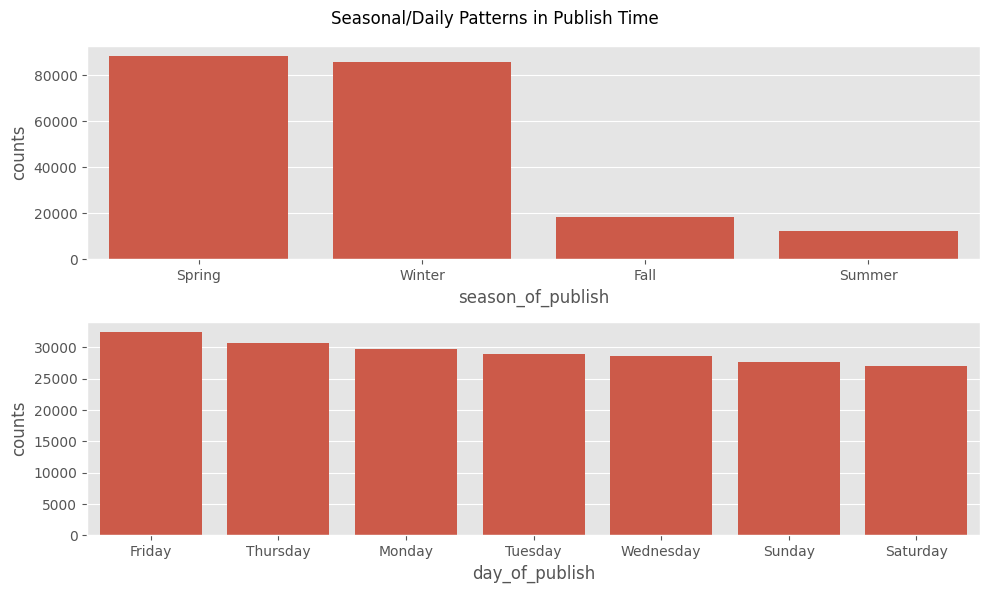

In [189]:
df_of_season_publish_count = df.value_counts(subset=['season_of_publish']).to_frame().reset_index()
df_of_day_publish_count = df.value_counts(subset=['day_of_publish']).to_frame().reset_index()

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

df_of_season_publish_count.columns = ['season_of_publish', 'counts']
df_of_day_publish_count.columns = ['day_of_publish', 'counts']

sns.barplot(df_of_season_publish_count, x='season_of_publish', y='counts', ax=axs[0])
sns.barplot(df_of_day_publish_count, x='day_of_publish', y='counts', ax=axs[1])
plt.suptitle('Seasonal/Daily Patterns in Publish Time')

plt.tight_layout()
output_path = './images/seasonal_daily_patterns_in_publish_time.png'
plt.savefig(output_path)
plt.show()

#### Effect of **comments_disabled** on **likes**:
- The videos with **comments_disabled** have an slightly lower **likes** than those which receive **comments**.

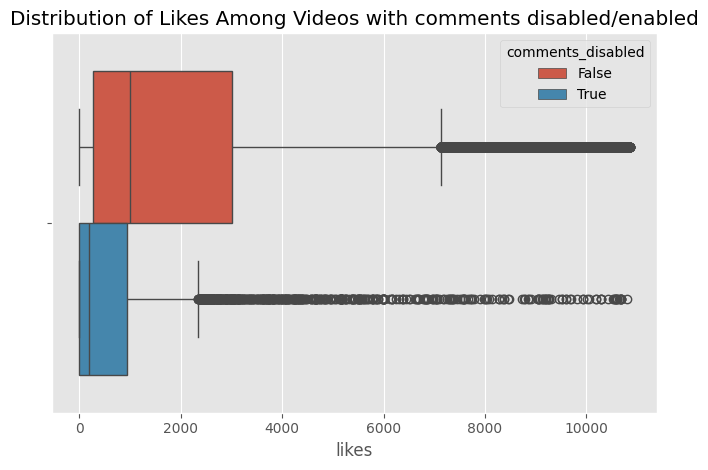

In [190]:
eigthy_quantile = df['likes'].quantile(0.8)

sns.boxplot(df[df['likes'] <= eigthy_quantile], x='likes', hue='comments_disabled')
plt.title('Distribution of Likes Among Videos with comments disabled/enabled')

plt.tight_layout()
output_path = './images/distro_of_likes_among_vids_with_cmnt_dis_enb.png'
plt.savefig(output_path)
plt.show()

#### Top 10 Categories in Having Videos with Comments Disabled:
- *Entertainment* and *News & Politics* take a very large percentage of all of the videos with **comments_disabled**.

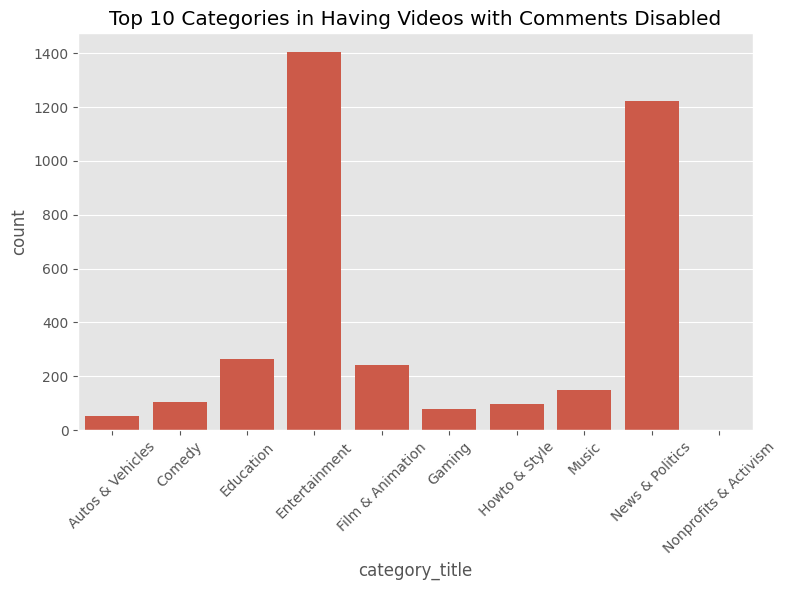

In [191]:
df_of_comments_disabled_counts_per_cat = df.copy()
df_of_comments_disabled_counts_per_cat = df_of_comments_disabled_counts_per_cat.groupby(by='category_title', as_index=False)['comments_disabled'].value_counts()
df_of_comments_disabled_counts_per_cat.drop(df_of_comments_disabled_counts_per_cat[df_of_comments_disabled_counts_per_cat['comments_disabled'] == False].index, inplace=True)
df_of_comments_disabled_counts_per_cat.sort_values(by='count', ascending=False)
df_of_comments_disabled_counts_per_cat = df_of_comments_disabled_counts_per_cat.head(10)
plt.figure(figsize=(8, 6))
sns.barplot(df_of_comments_disabled_counts_per_cat, x='category_title', y='count')
plt.xticks(rotation=45)
plt.title('Top 10 Categories in Having Videos with Comments Disabled')

plt.tight_layout()
output_path = './images/distribution_of_dis_cmnt_diff_cat.png'
plt.savefig(output_path)
plt.show()

#### Distribution of **views** for different **dislike_ratios**:
- **dislike_ratio** has a significant impact on **views**. (as we increase **dislike_ratio**, the **views** start to fall off dramatically)

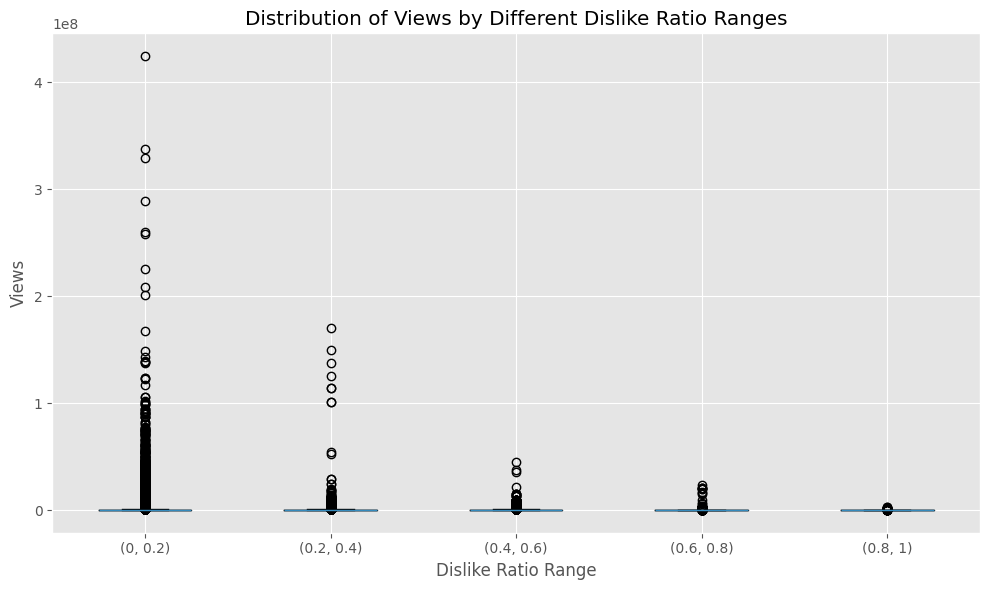

In [192]:
ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)]
labels = ['(0, 0.2)', '(0.2, 0.4)', '(0.4, 0.6)', '(0.6, 0.8)', '(0.8, 1)']
views_per_range = []

for r in ranges:
    subset = df[(df['dislike_rate'] >= r[0]) & (df['dislike_rate'] < r[1])]
    views_per_range.append(subset['views'])

plt.figure(figsize=(10, 6))
plt.boxplot(views_per_range)
plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel('Dislike Ratio Range')
plt.ylabel('Views')
plt.title('Distribution of Views by Different Dislike Ratio Ranges')

plt.tight_layout()
output_path = './images/distro_of_views_diff_dis_ratio_ranges.png'
plt.savefig(output_path)
plt.show()

#### Distribution of **engagement_score** for different **dislike_ratios**:
- videos with low or high **dislike_ratio** receive high **engagement_score** while the videos with moderate **dislike_ratio** receive low **engagement_scores**.  

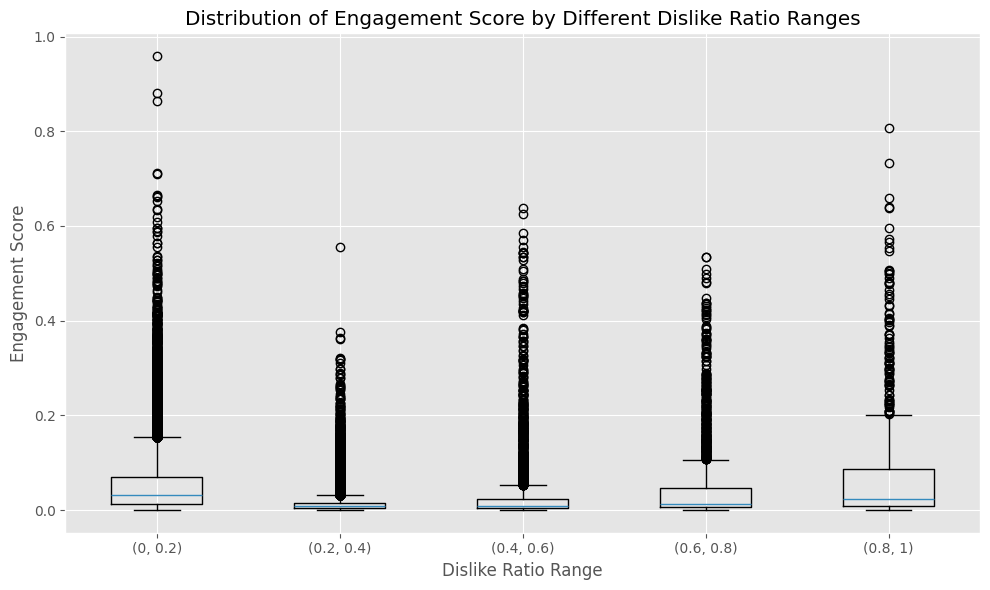

In [193]:
ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)]
labels = ['(0, 0.2)', '(0.2, 0.4)', '(0.4, 0.6)', '(0.6, 0.8)', '(0.8, 1)']
views_per_range = []

for r in ranges:
    subset = df[(df['dislike_rate'] >= r[0]) & (df['dislike_rate'] < r[1])]
    views_per_range.append(subset['engagement_score'])

plt.figure(figsize=(10, 6))
plt.boxplot(views_per_range)
plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel('Dislike Ratio Range')
plt.ylabel('Engagement Score')
plt.title('Distribution of Engagement Score by Different Dislike Ratio Ranges')

plt.tight_layout()
output_path = './images/distro_of_eng_score_diff_dis_ratio_ranges.png'
plt.savefig(output_path)
plt.show()

## Statistical Questions:

#### Is there a significant association between the day of the week a video is published and its likelihood of trending?
- We can't actually answer this question because we don't have the data related to untrended videos.

#### Is there a significant difference in viewer engagement (likes-to-views ratio) across different video categories?
- Yes the p-value is so high.

In [194]:
df_containing_like_to_view_ratio = df.copy()
df_containing_like_to_view_ratio['like_to_view_rate'] = df_containing_like_to_view_ratio['likes'] / df_containing_like_to_view_ratio['views'] 
unique_categories = df_containing_like_to_view_ratio['category_title'].unique()
grouped_data = [df_containing_like_to_view_ratio[df_containing_like_to_view_ratio['category_title'] == cat]['like_to_view_rate'] for cat in unique_categories]
stat, p = stats.kruskal(*grouped_data)

print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"p-value: {p}")

Kruskal-Wallis H-statistic: 24448.963592398268
p-value: 0.0
